In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Notes

The function ```np.dot()``` in NumPy is used to compute the dot product of two arrays (vectors or matrices). It behaves differently depending on the shape of the inputs.

- ```np.dot(a, b)```:
    - if ```a``` and ```b``` are 1-d arrays (vectors) → Computes dot product (scalar result).
    - if ```a``` is a matrix & ```b``` is a vector → Performs matrix-vector multiplication.
    - if ```a``` is a matrix & ```b``` is matrix → Performs matrix multiplication.
```
import numpy as np

a = np.array([1, 2, 3]) # a is vector
b = np.array([4, 5, 6]) # b is a vector

result = np.dot(a, b)  # Computes 1*4 + 2*5 + 3*6 = 32
print(result)  # Output: 32
```

The function ```np.where()``` in NumPy is a powerful function used for conditional selection and element-wise operations. It can be used in different ways depending on how many arguments are provided.

````
arr = np.array([10, 20, 30, 40, 50])

# If element > 25, replace with 1; otherwise, replace with 0
result = np.where(arr > 25, 1, 0)

print(result)  
# Output: [0 0 1 1 1]
```

## Creating the Perceptron Class

In [5]:
class Perceptron:
    """Perceptron classifier.
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_epoch : int
        Number of passes over the training dataset.
    random_seed : int
        Random number generator seed for random weight initialization.

    Attributes
    -----------
    m_features : int
        Number of predictor variables/features
    w_ : 1d-array 
        A weights vector of length m_features.
    b_ : Scalar
        Bias unit after fitting.
    errors_ : list
        Number of misclassifications in each epoch.
    """
    
    def __init__(self, eta=0.1, n_epochs = 50, random_state = 1):
        self.eta = 0.1
        self.n_epochs = n_epochs
        self.random_state = random_state

    def net_input(self, x):
        """
        Parameters
        ------------
        x : 1-d array
            An object (data point) represented as a vector of length m_features
        
        Returns
        --------
        z : float
            A scalar value that represents the linear combination of weights and inputs
        """
        ## TODO: compute z 
        ## Hint: use np.dot(a, b) + scalar value

        z = np.dot(x, self.w_) + self.b_

        
        return z
    
    def predict(self, x):
        """
        Predict the class label of an object x
        """
        ##TODO : call the net_input method
        z = self.net_input(x)

        ## use unit step function to predict the class_label
        y_hat = np.where(z >= 0.0, 1, 0)
        return y_hat


    def fit(self, X, Y):
        """ Fiting the training data
        Training the perceptron model with the given dataset. To find the best values for w (weights) and  b  (bias) 
        so that it correctly classifies all training examples into their respective classes. 

        Parameters:
        X : {array-like}, shape = [n_objects, m_features]
            The m by n input feature matrix, where each row is a training example (object), and each column is a feature.
            The total number of rows (m_examples) represents the total number of objects .
            The total number of columns (n_features) represents the total number of predictor variables.
        Y : {array-like}, shape = [n_objects]
            Target values or class labels.
            i'th value of Y corresponds to i'th row in X
        """
        
        # 1) intialize the weights and bias
        rgen = np.random.RandomState(self.random_state) # create an instance of random number generator
        self.m_features = X.shape[1] # get the number of predictor variables (features)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=self.m_features) ## an instance attribute for the weights of the Perceptron
        self.b_ = np.float64(0.) ## an instance attribute for the bias value

        # sanity check
        self.errors_ = [] ## logging the number of missclassified data points during training

        # 2) update the weights and bias
        for _ in range(self.n_epochs): # repeat for n_epochs
            num_miss = 0 ## tracking misslabeled xi in each epoch
            for xi, yi in zip(X,Y):
                # xi represents a single training sample (one row of X)
                # yi represents the class label or target value of xi.
                
                ##TODO: predict the class label of xi

                yi_hat = self.predict(xi)

                ##TODO: compute the difference between actual and predicted label of xi
                diff = yi - yi_hat
                num_miss += int(diff != 0.0)
                
                ##TODO: compute delta weights
                delta_w = self.eta * diff * xi 

                ##TODO: compute delta bias
                delta_b = self.eta * diff 

                ##TODO: update weights
                self.w_ = self.w_ + delta_w 

                ##TODO: update bias
                self.b_ = self.b_ + delta_b
            
            self.errors_.append(num_miss)
        return self
        

## Training a perceptron model on the Iris dataset

### Get original iris dataset

In [6]:
iris = sns.load_dataset('iris')
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


### Slicing the iris data set for binary classification
Originally, the iris dataset has 3 unique labels: Setosa, VersiColor, and Virginica. 
However, to show the binary classification, we only use two labels: Setosa and VersiColor. We will also use two features: petal_length and sepal_length

In [7]:
df = iris.iloc[0:99, [0, 2, 4]]
df.tail()

,sepal_length,petal_length,species
94,5.6,4.2,versicolor
95,5.7,4.2,versicolor
96,5.7,4.2,versicolor
97,6.2,4.3,versicolor
98,5.1,3.0,versicolor


In [8]:
np.unique(df['species'])

array(['setosa', 'versicolor'], dtype=object)

In [9]:
df.shape

(99, 3)

In [10]:
df.columns

Index(['sepal_length', 'petal_length', 'species'], dtype='object')

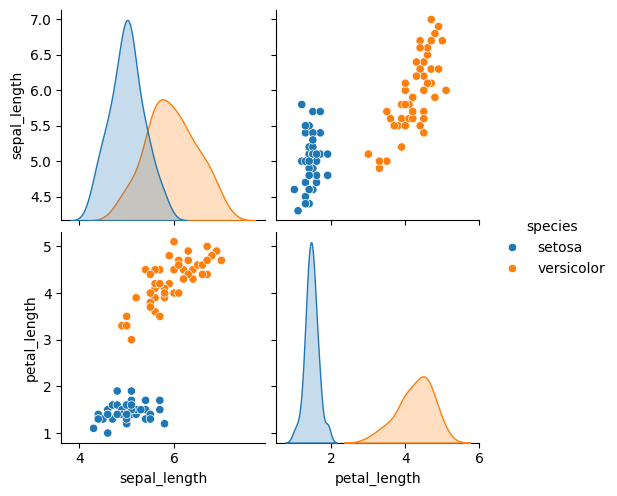

In [11]:
sns.pairplot(df, hue='species')
plt.show()

### Transform the species column (class label) into numerical values

In [12]:
# create a mapping dict
# to convert class labels from strings to integers
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['species']))}
print(f'class_mapping = {class_mapping}')

# convert class labels from strings to integers
df['species'] = df['species'].map(class_mapping)
df

class_mapping = {'setosa': 0, 'versicolor': 1}


,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
94,5.6,4.2,1
95,5.7,4.2,1
96,5.7,4.2,1
97,6.2,4.3,1


### Splitting Dataset: Training and Testing Set

In [13]:
from sklearn.model_selection import train_test_split

# Split df into features (X) and labels (y)
X = df[['sepal_length', 'petal_length']]  # Features (first two columns)
Y = df['species']  # Target label (last column)

# Split the dataset into training and testing sets
# test_size=0.2 means 80% training, 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Display the shape and date type of the splits
print(f"Training data shape (X_train): {X_train.shape}")
print(f"Testing data shape (X_test): {X_test.shape}")
print(f'type(X_train): {type(X_train)}')
print(f'type(Y_train): {type(Y_train)}')
print(f'type(X_test): {type(X_test)}')
print(f'type(Y_test): {type(Y_test)}')

Training data shape (X_train): (79, 2)
Testing data shape (X_test): (20, 2)
type(X_train): <class 'pandas.core.frame.DataFrame'>
type(Y_train): <class 'pandas.core.series.Series'>
type(X_test): <class 'pandas.core.frame.DataFrame'>
type(Y_test): <class 'pandas.core.series.Series'>


### Train the Perceptron model

In [15]:
perceptron_model = Perceptron(eta = 0.01, n_epochs=10 , random_state = 2 )
perceptron_model = perceptron_model.fit(X_train.values, Y_train.values)

Text(0.5, 1.0, 'Number of missclassified data points during the training (fitting)')

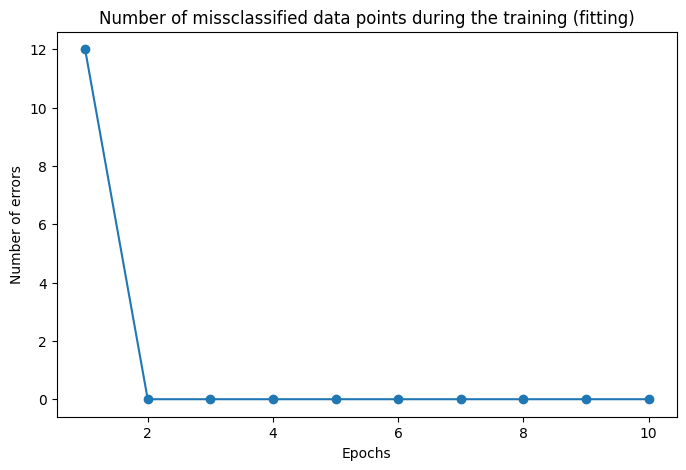

In [16]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(perceptron_model.errors_) + 1), perceptron_model.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.title('Number of missclassified data points during the training (fitting)')

### Predict the class label of data points in testing set

In [17]:
from sklearn.metrics import accuracy_score

Y_test_hats = []
for xi in X_test.values:
    y_hat = perceptron_model.predict(xi)
    Y_test_hats.append(y_hat)

## compare the predicted and actual label of testing set
equal = [ y_hat == y for y_hat, y in zip(Y_test_hats, Y_test)]
print("Are the predicted and actual label of testing set equal?")
print(equal)

# Calculate accuracy
accuracy = accuracy_score(np.array(Y_test_hats), Y_test.values)
print(f"Accuracy of the testing set: {accuracy * 100:.2f}%")  # Display accuracy

Are the predicted and actual label of testing set equal?
[np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_, np.True_]
Accuracy of the testing set: 100.00%


### A function for plotting decision regions
This function is from https://github.com/rasbt/machine-learning-book

In [18]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, Y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(Y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(Y)):
        plt.scatter(x=X[Y == cl, 0], 
                    y=X[Y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

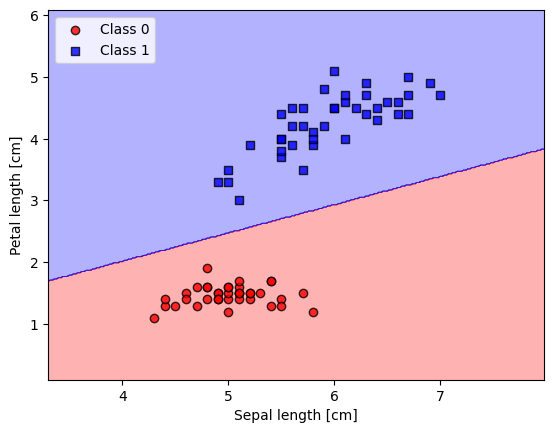

In [19]:
plot_decision_regions(X_train.values, Y_train.values, classifier=perceptron_model)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
#plt.savefig('images/02_08.png', dpi=300)
plt.show()